Importing the Dependencies

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # Will use the standardize the data.
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Analysis

PIMA Diabetes Dataset (Only Women)

In [110]:
diabates_data = pd.read_csv("diabetes.csv") # Load csv into a Pandas DataFrame.

diabates_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
# Number of rows and cols

diabates_data.shape

(768, 9)

In [112]:
# Get the summary

diabates_data.groupby("Outcome").mean() #Preguessing the correlations. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [113]:
diabates_data["Outcome"].value_counts() # Not close numbers may the prediction can converge.

Outcome
0    500
1    268
Name: count, dtype: int64

In [114]:
# Is there any null values? 

diabates_data.isna().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
Name: count, dtype: int64

In [115]:
# Separating data and the labels

X = diabates_data.drop(columns="Outcome", axis=1)
Y = diabates_data["Outcome"]

Data Visualization

In [116]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)
train_data = X_train.join(Y_train)

<Axes: >

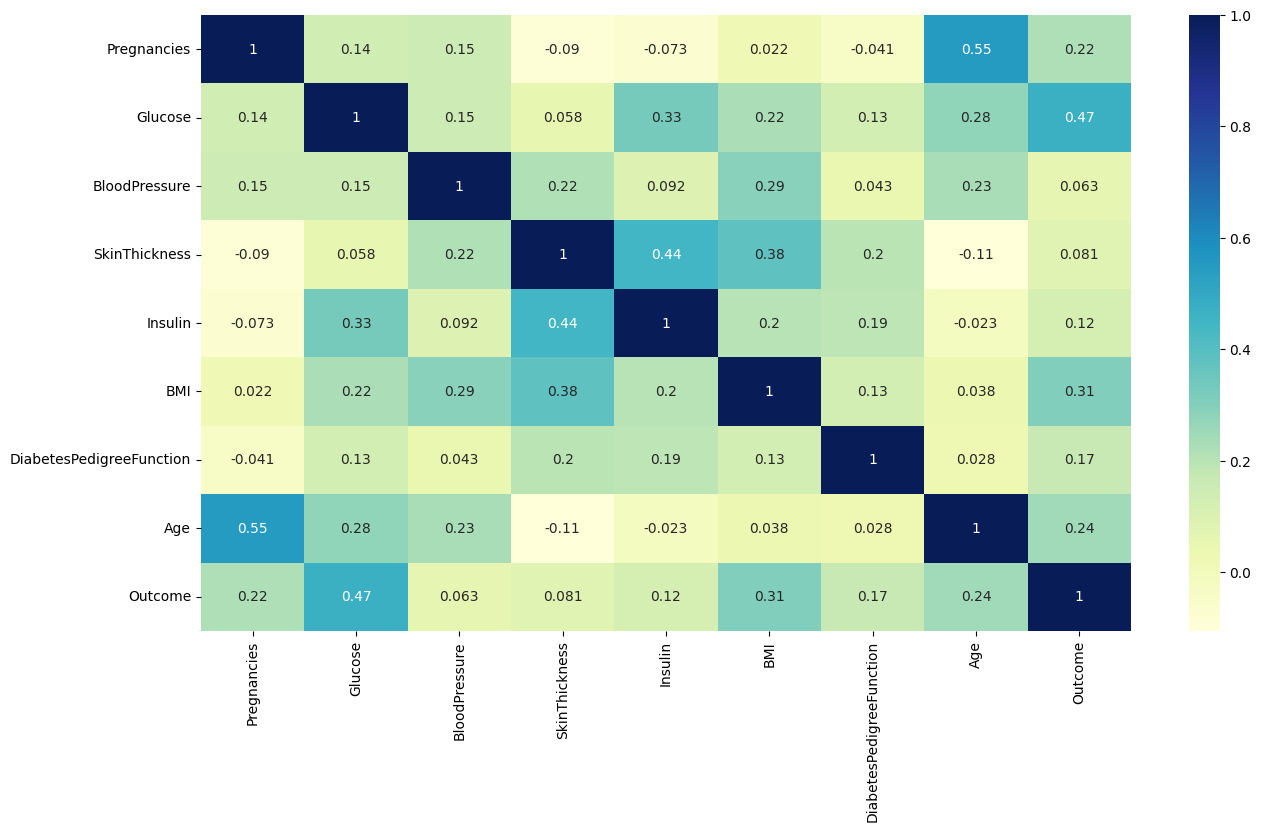

In [117]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

Data Standardization

In [118]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [119]:
standardized_data = scaler.transform(X)
X = standardized_data

In [120]:
# Getting test and train data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

Training the model

In [121]:
classfier = svm.SVC(kernel="linear")

In [122]:
# Training the support vector machine

classfier.fit(X_train, Y_train)

SVC(kernel='linear')

Evaluation of the Model

In [123]:
# How accurate the training model.

X_train_prediction = classfier.predict(X_train)

X_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("The result is: ", X_train_accuracy)

The result is:  0.784370477568741


In [124]:
# How accurate the test model.
X_test_prediction = classfier.predict(X_test)

X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("The result is: ", X_test_accuracy)

The result is:  0.7792207792207793


Making a Predictive System

In [125]:
def isdiabetic(predictionasparameter):
    if predictionasparameter:
        return "Diabetic"
    else:
        return "Not Diabetic"

In [129]:
# Getting first row the check.
input_data = diabates_data.iloc[0][:-1]

input_data_as_nump_array = np.asarray(input_data)

input_data_reshaped = input_data_as_nump_array.reshape(1, -1)

# Standardize the input data.
std_data = scaler.transform(input_data_reshaped)

prediction = classfier.predict(std_data)

print("The prediction is " + isdiabetic(prediction))

# Checking for a non-Diabetic patient.

input_data2 = diabates_data.iloc[1][:-1]

input_data_as_nump_array2 = np.asarray(input_data2)

input_data_reshaped2 = input_data_as_nump_array2.reshape(1, -1)

# Standardize the input data.
std_data2 = scaler.transform(input_data_reshaped2)

prediction = classfier.predict(std_data2)

print("The prediction is " + isdiabetic(prediction))

The prediction is Diabetic
The prediction is Not Diabetic


C:\Users\gulse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\gulse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
